In [13]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc
from mcpy.system import Grid, MCDrive

In [21]:
Ms = 3.84e5
A = 8.78e-12

d = 150e-9
hb = 20e-9
ht = 10e-9

cell = (5.0e-9, 5.0e-9, 2.5e-9)

D_bloch = {'r1': -1.58e-3, 'r2': 1.58e-3, "r1:r2": 1.58e-9}

In [22]:

def create_system():
    subregions = {'r1': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)), 'r2': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))}

    p1 = (-d/2, -d/2, -hb)
    p2 = (d/2, d/2, ht)

    mesh = df.Mesh(p1=p1, p2=p2, cell=cell, subregions=subregions)

    def Ms_fun(point):
        x, y, z = point
        if x**2 + y**2 < (d/2)**2:
            return Ms
        else:
            return 0

    system = mm.System(name='bloch_point')

    system.energy = mm.Exchange(A=A) + mm.DMI(D=D_bloch, crystalclass='T')
    system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms_fun)

    return system

In [23]:
system = create_system()

regions = {'r1': (-hb, 0), 'r2': (0, ht)}

data = Grid(system, Ms=Ms, regions=regions)

In [24]:
mc = MCDrive(data, energy_calc=5, schedule_name='blochness101', schedule={'type': 'FC', 'start_temp': 60.01, 'end_temp': 0.00000001, 'start_field': [0,0,0], 'end_field': [0, 0, 0], 'steps': 10})

Schedule initialized: FC
Start temperature: 60.01K
Steps: 10
End temperature will be 0.0K in -6.000999998999999K per steps.
Start field: 0 A/m
End field will be: 0.0 in 0.0 A/m per steps.


Step: 0, Temperature: 60.01K, Field: 0 A/m
Step: 1, Temperature: 54.01K, Field: 0 A/m
Step: 2, Temperature: 48.01K, Field: 0 A/m
Step: 3, Temperature: 42.01K, Field: 0 A/m
Step: 4, Temperature: 36.01K, Field: 0 A/m
Step: 5, Temperature: 30.01K, Field: 0 A/m
Step: 6, Temperature: 24.0K, Field: 0 A/m
Step: 7, Temperature: 18.0K, Field: 0 A/m
Step: 8, Temperature: 12.0K, Field: 0 A/m
Step: 9, Temperature: 6.0K, Field: 0 A/m
Step: 10, Temperature: 0.0K, Field: 0 A/m


c:\Users\M Gulam Nabi\anaconda3\envs\irp\lib\site-packages\discretisedfield\plotting\mpl.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


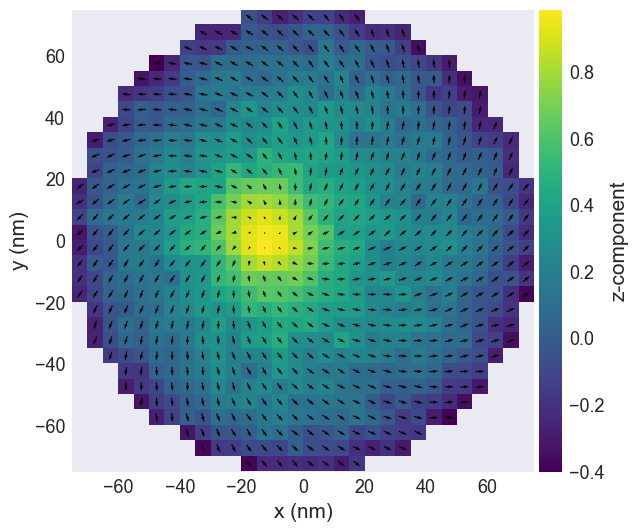

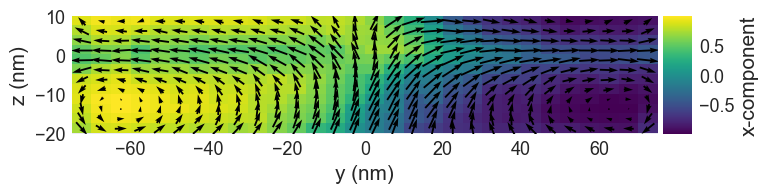

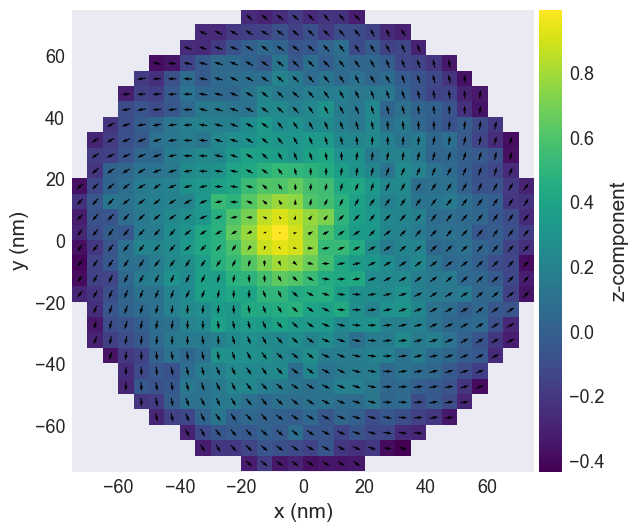

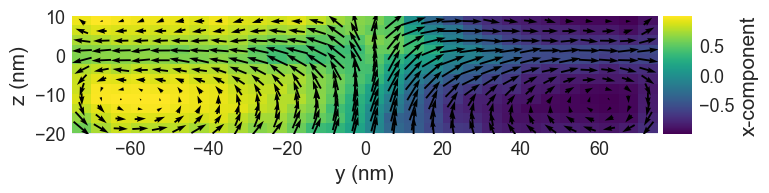

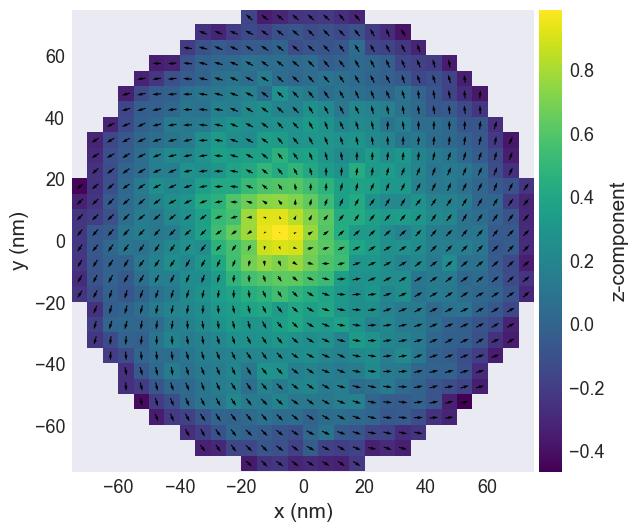

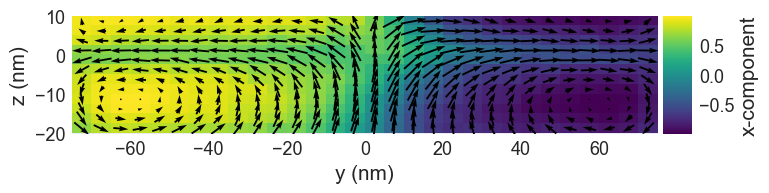

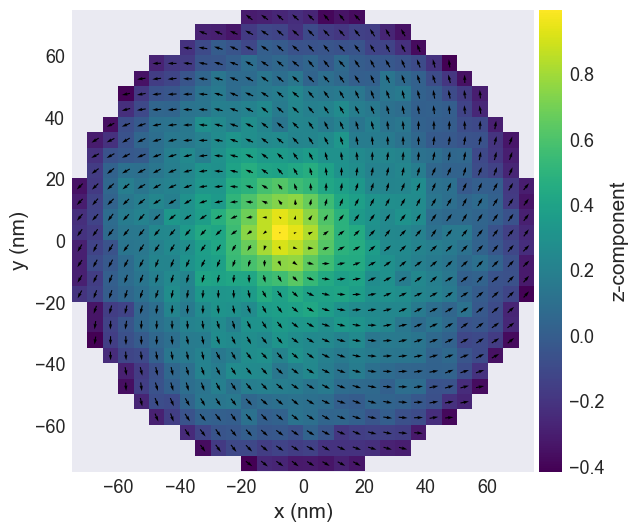

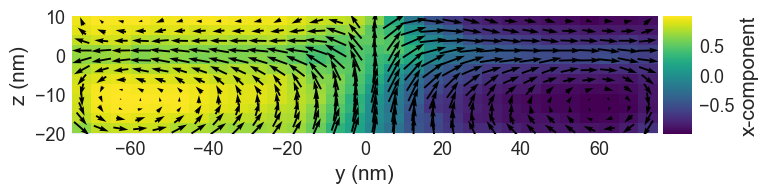

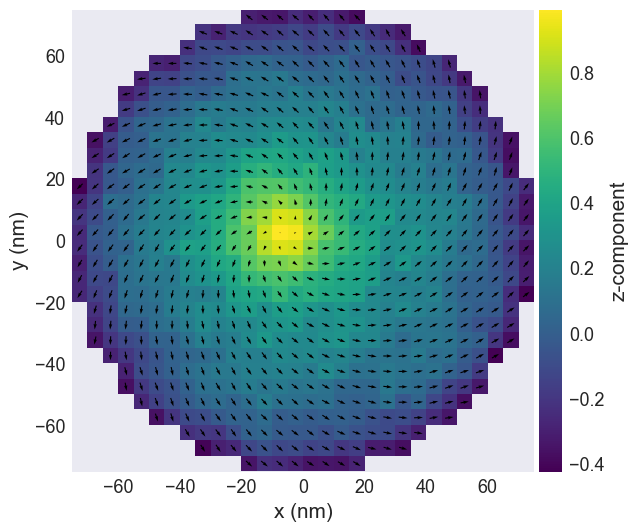

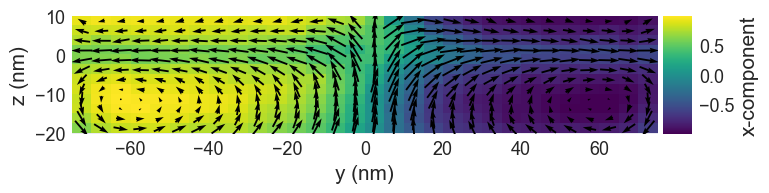

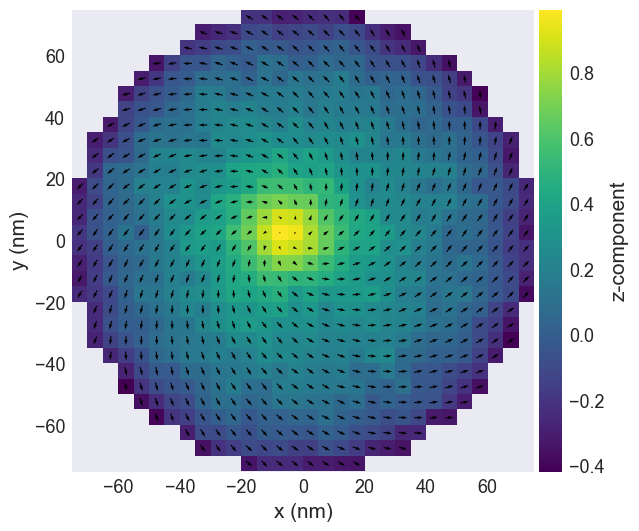

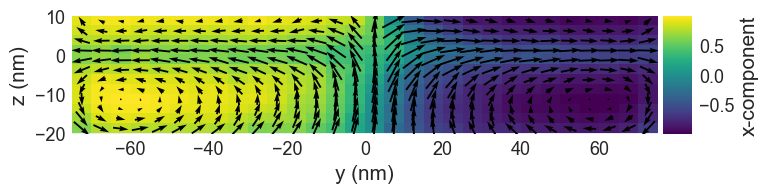

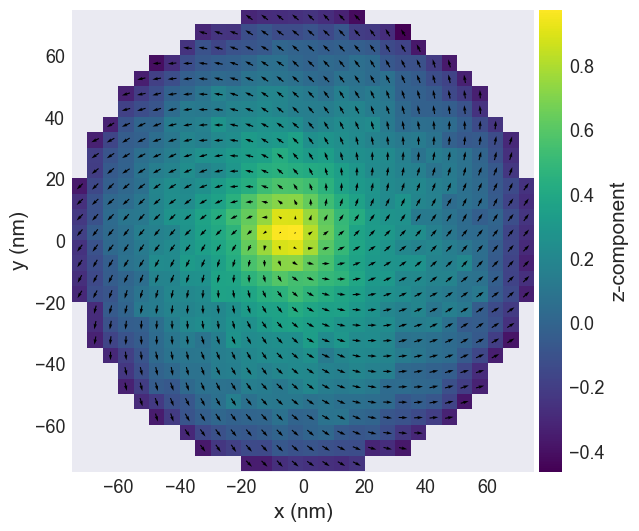

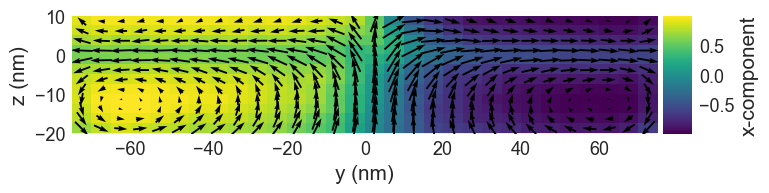

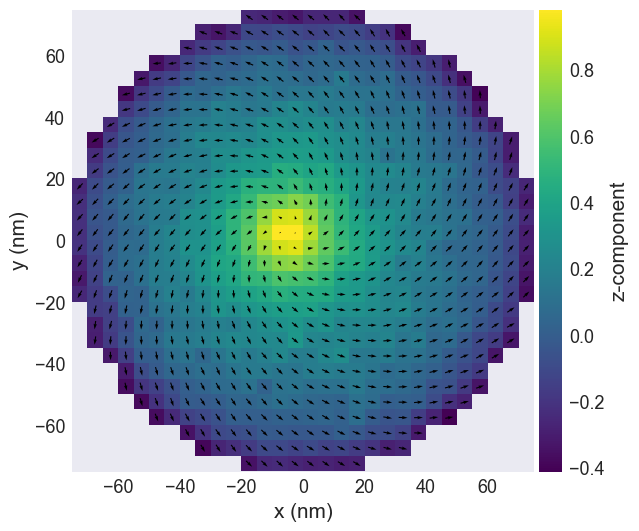

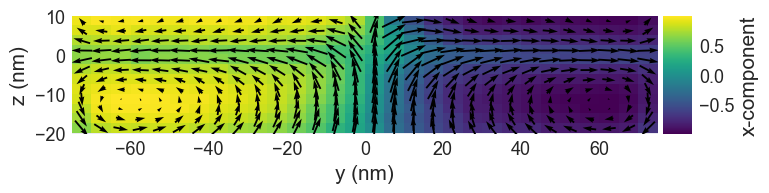

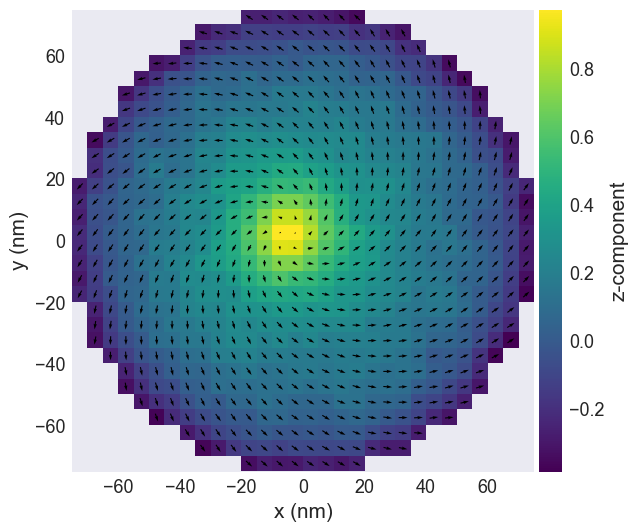

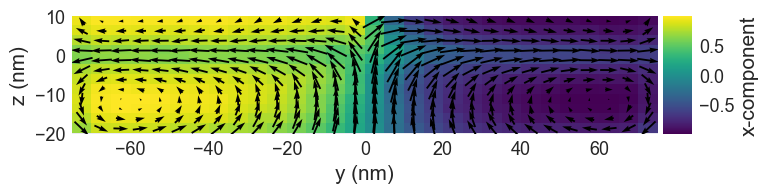

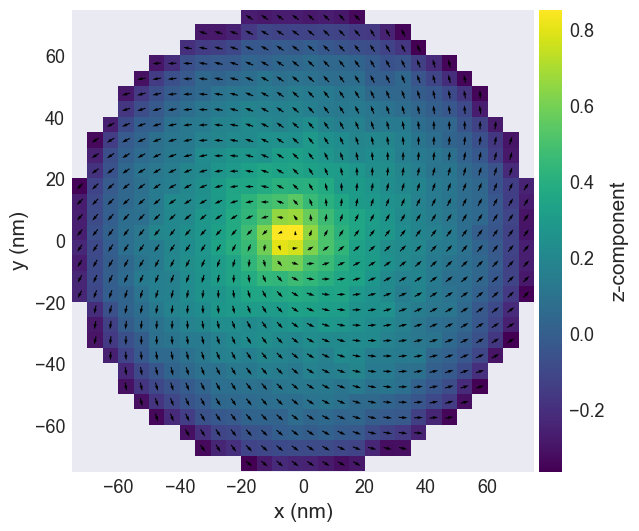

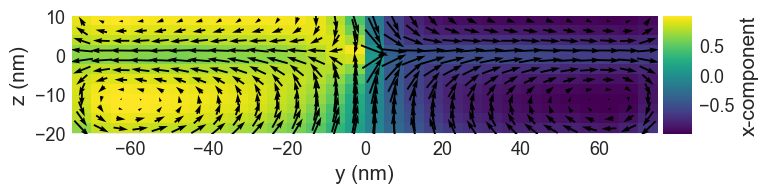

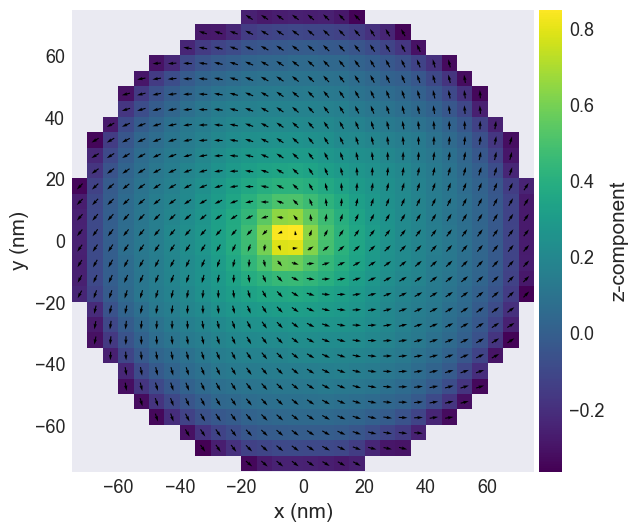

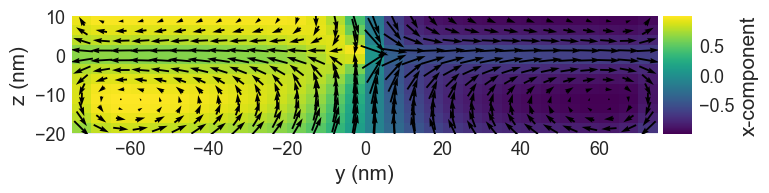

In [25]:
mc.drive(N=30000000, save=True, plot_x=True, plot_z=True)

In [26]:
import numpy as np


def counting(field):
    """Compute convolution S(x) and round to integer."""
    F_div = df.tools.emergent_magnetic_field(field.orientation).div
    F_int = df.integral(F_div * df.dV, direction='yz').integral(direction='x', improper=True)
    bp_count = (F_int / (4 * np.pi)).array.squeeze()
    
    return bp_count, bp_count.round()

In [27]:
counting(mc.grid.system.m)

(array([-0.01343673, -0.03406607, -0.04905149, -0.06452662, -0.07316183,
        -0.07828613, -0.08587976, -0.10445851, -0.11561735, -0.12431204,
        -0.14201648, -0.15977988, -0.20708185, -0.63004908, -1.05548902,
        -1.10773357, -1.11292729, -1.11192066, -1.12459628, -1.13969227,
        -1.14543562, -1.15573137, -1.17193887, -1.1765143 , -1.18259895,
        -1.19287707, -1.20847852, -1.22480447, -1.24462188, -1.25408343]),
 array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.]))